In [3]:
import pandas as pd
df = pd.read_csv(r"D:\Master Uni Marburg\2nd Term Summer 25\XAI\Exercise\[ss25]week_1\[ss25]week_1\practical-exercise\dataset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df['Outcome'].sum()/len(df)

0.3489583333333333

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:{num_distinct_values} distinct values")

Pregnancies:17 distinct values
Glucose:136 distinct values
BloodPressure:47 distinct values
SkinThickness:51 distinct values
Insulin:186 distinct values
BMI:248 distinct values
DiabetesPedigreeFunction:517 distinct values
Age:52 distinct values
Outcome:2 distinct values


In [9]:
df.describe().style.format("{:.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt

In [19]:
y_base_line = [0] * len(y_pred)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



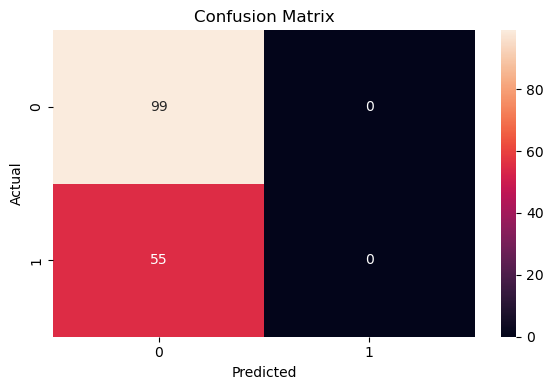

In [55]:
cm = confusion_matrix(y_test,y_base_line)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("baseline_confusion_matrix.png", dpi=300)
print(classification_report(y_test,y_base_line,zero_division=0))
report = classification_report(y_test,y_base_line,zero_division=0)
with open("baseline_classification_report.txt", "w") as f:
    f.write(report)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



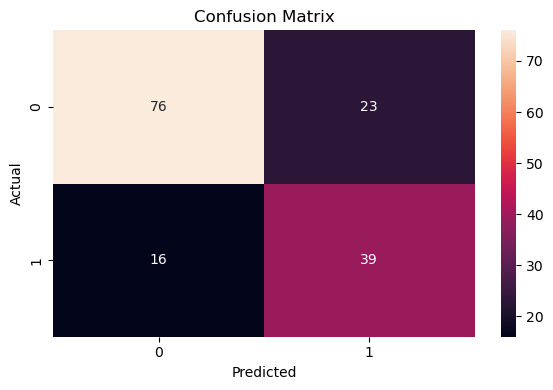

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("dt_confusion_matrix.png", dpi=300)
print(classification_report(y_test, y_pred, zero_division=0))
report = classification_report(y_test,y_pred,zero_division=0)
with open("dt_classification_report.txt", "w") as f:
    f.write(report)

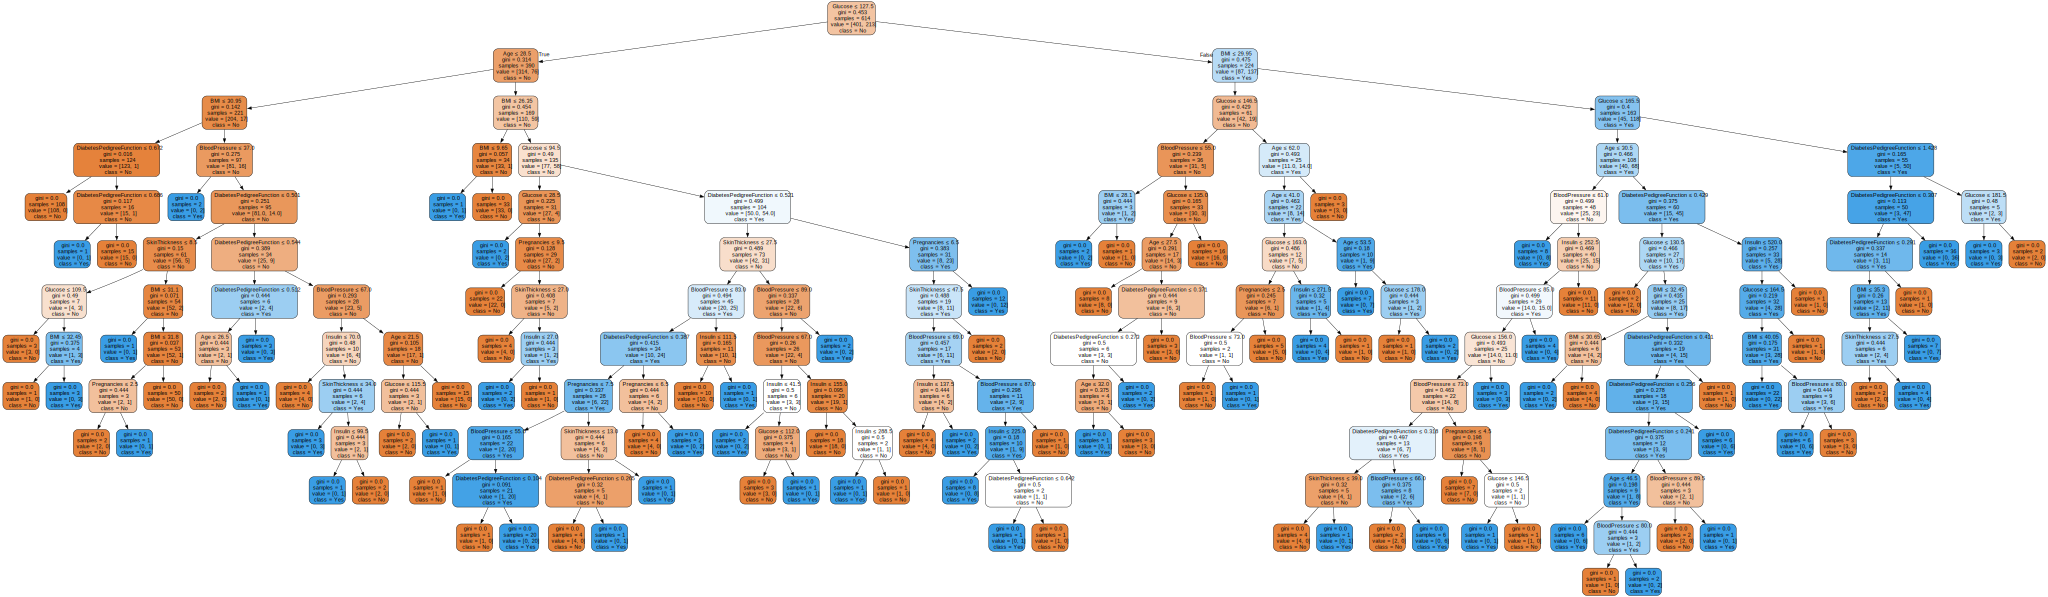

In [61]:
features = X_train.columns
target = ["No","Yes"]
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=target,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree",format="png", cleanup=True)
graph

In [63]:
X_test.iloc[12]

Pregnancies                   4.00
Glucose                     148.00
BloodPressure                60.00
SkinThickness                27.00
Insulin                     318.00
BMI                          30.90
DiabetesPedigreeFunction      0.15
Age                          29.00
Name: 199, dtype: float64

In [65]:
print(f"The prediction is {clf.predict(X_test.iloc[12:13])[0]}")

The prediction is 1


In [67]:
print(f"The ground truth is {y_test.iloc[12]}")

The ground truth is 1


In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 3, random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



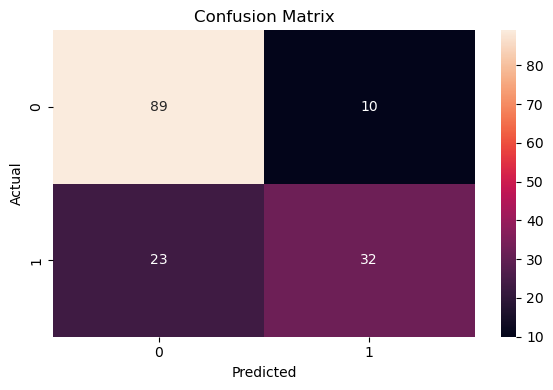

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("rf_confusion_matrix.png", dpi=300)
print(classification_report(y_test, y_pred))
report = classification_report(y_test,y_pred)
with open("rf_classification_report.txt", "w") as f:
    f.write(report)